<a href="https://www.kaggle.com/code/aleksandrmorozov123/detectron2?scriptVersionId=236532082" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/test.json
/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/training.json
/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/images/1c87b997-a8e6-48ca-bf40-19b9a7fd6a96.png
/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/images/b426ef1d-4a59-4f90-b593-50226af60a60.png
/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/images/4c13e22e-dfd1-4fa1-b373-be9d0c272c0f.png
/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/images/a4d7a7e1-5ae1-486d-b6ee-c9af1476ccad.png
/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/images/c6807595-100a-4aa1-a5f6-882a20ca3d32.jpg
/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/images/4736f545-1f1f-4d77-9241-d69cbf4dae35.png
/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/images/716273ea-19c4-49af-8604-df587b295eca.png
/kaggle/input/p-vivax-malaria-infected-human-b

**In this notebook I show capabilities of Detectron2**

In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-90vev08e
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-90vev08e
  Resolved https://github.com/facebookresearch/detectron2.git to commit 536dc9d527074e3b15df5f6677ffe1f4e104a4ab
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.2 MB/s eta 0:00:0000:01
  Created wheel for detectron2: filename=detectron2-0.6-cp311-cp311-linux_x86_64.whl size=6384346 sha256=f6ad8d8c6f13c5100ee0b194ad7a6e234ad9417c46025323a6a623d4b61df717
  Stored in directory: /tmp/pip-ephem-wheel-cache-scsvl45p/wheels/17/d9/40/60db98e485aa

In [3]:
# import required libraries
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

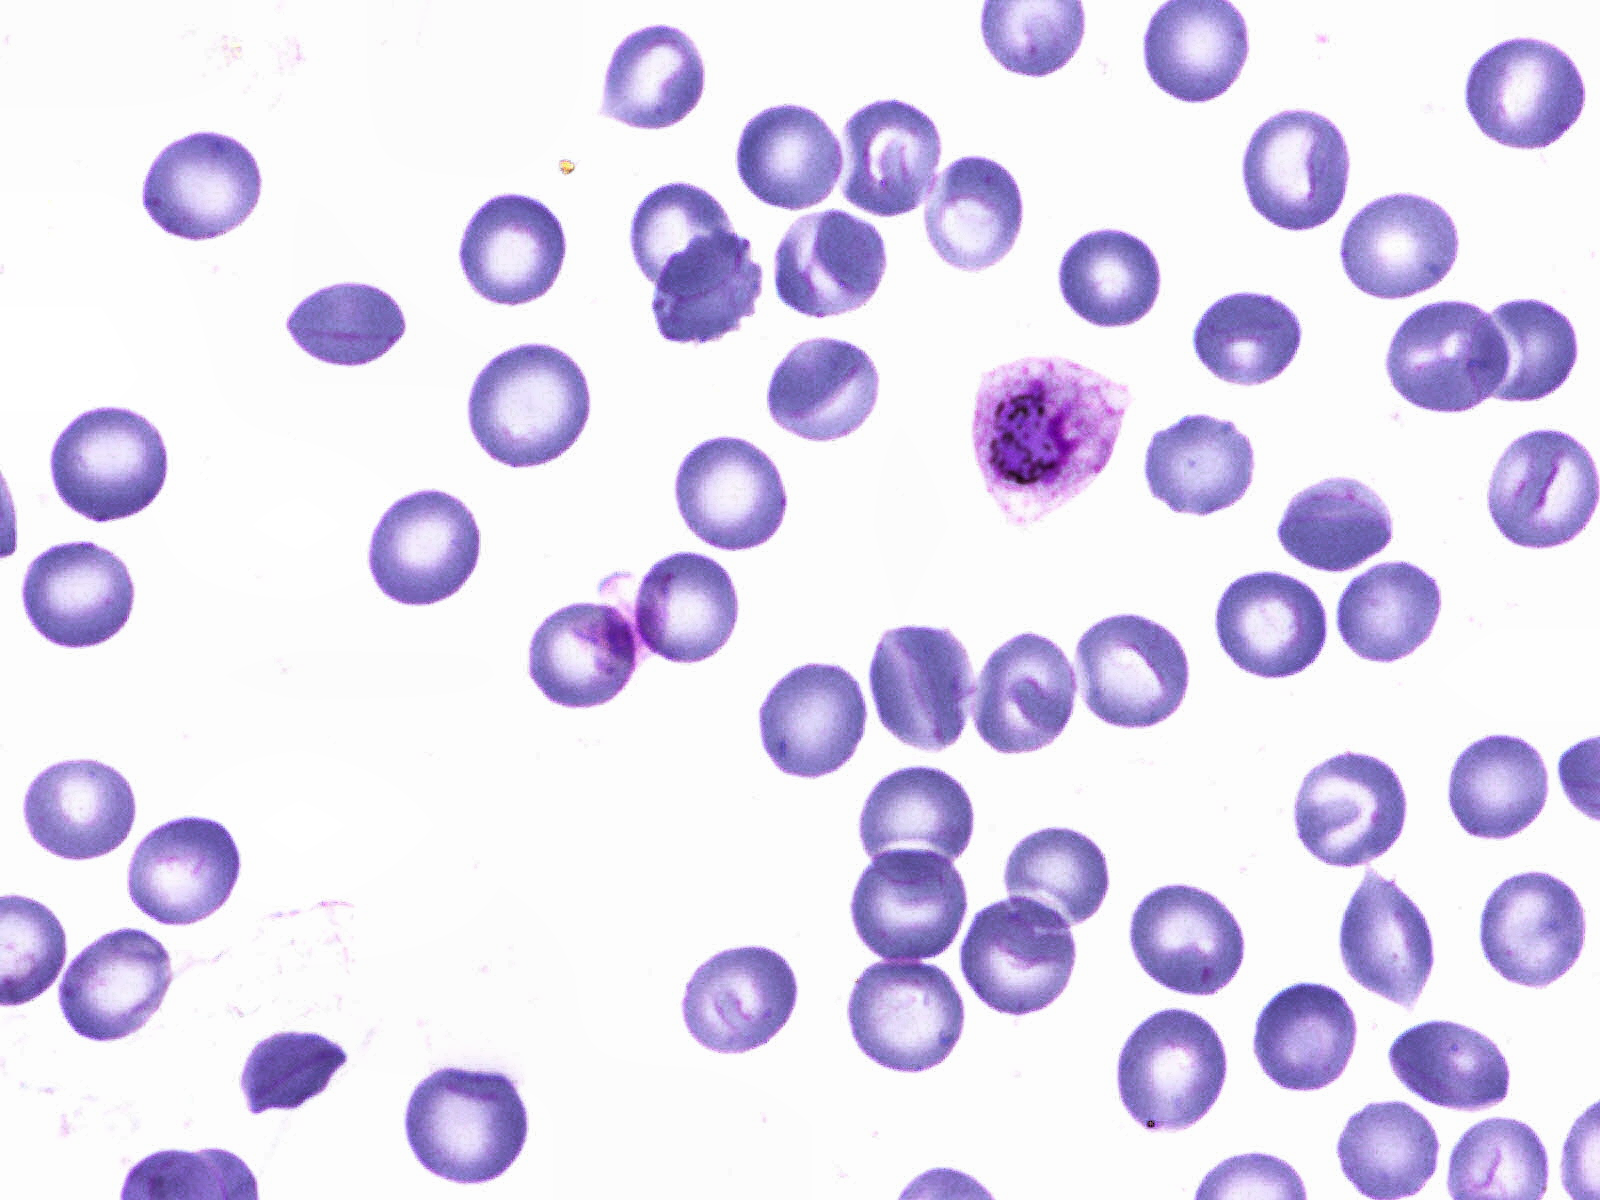

In [4]:
im = cv2.imread('/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/images/002f20ad-2ace-499c-9335-c9080bc3e6b5.png')
cv2_imshow(im)

In [5]:
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[04/28 04:03:36 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:02, 75.4MB/s]                              
/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
# print the outputs
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([32, 32, 54, 32, 74, 32], device='cuda:0')
Boxes(tensor([[ 369.4444,  490.4654,  481.8393,  607.4105],
        [ 143.9130,  133.0542,  262.7658,  240.7970],
        [ 974.0559,  356.0972, 1129.7474,  520.6948],
        [  51.9531,  408.9268,  167.0940,  522.3521],
        [   0.0000,    0.0000, 1600.0000, 1171.1970],
        [ 404.6007, 1067.9120,  524.4508, 1185.6495]], device='cuda:0'))


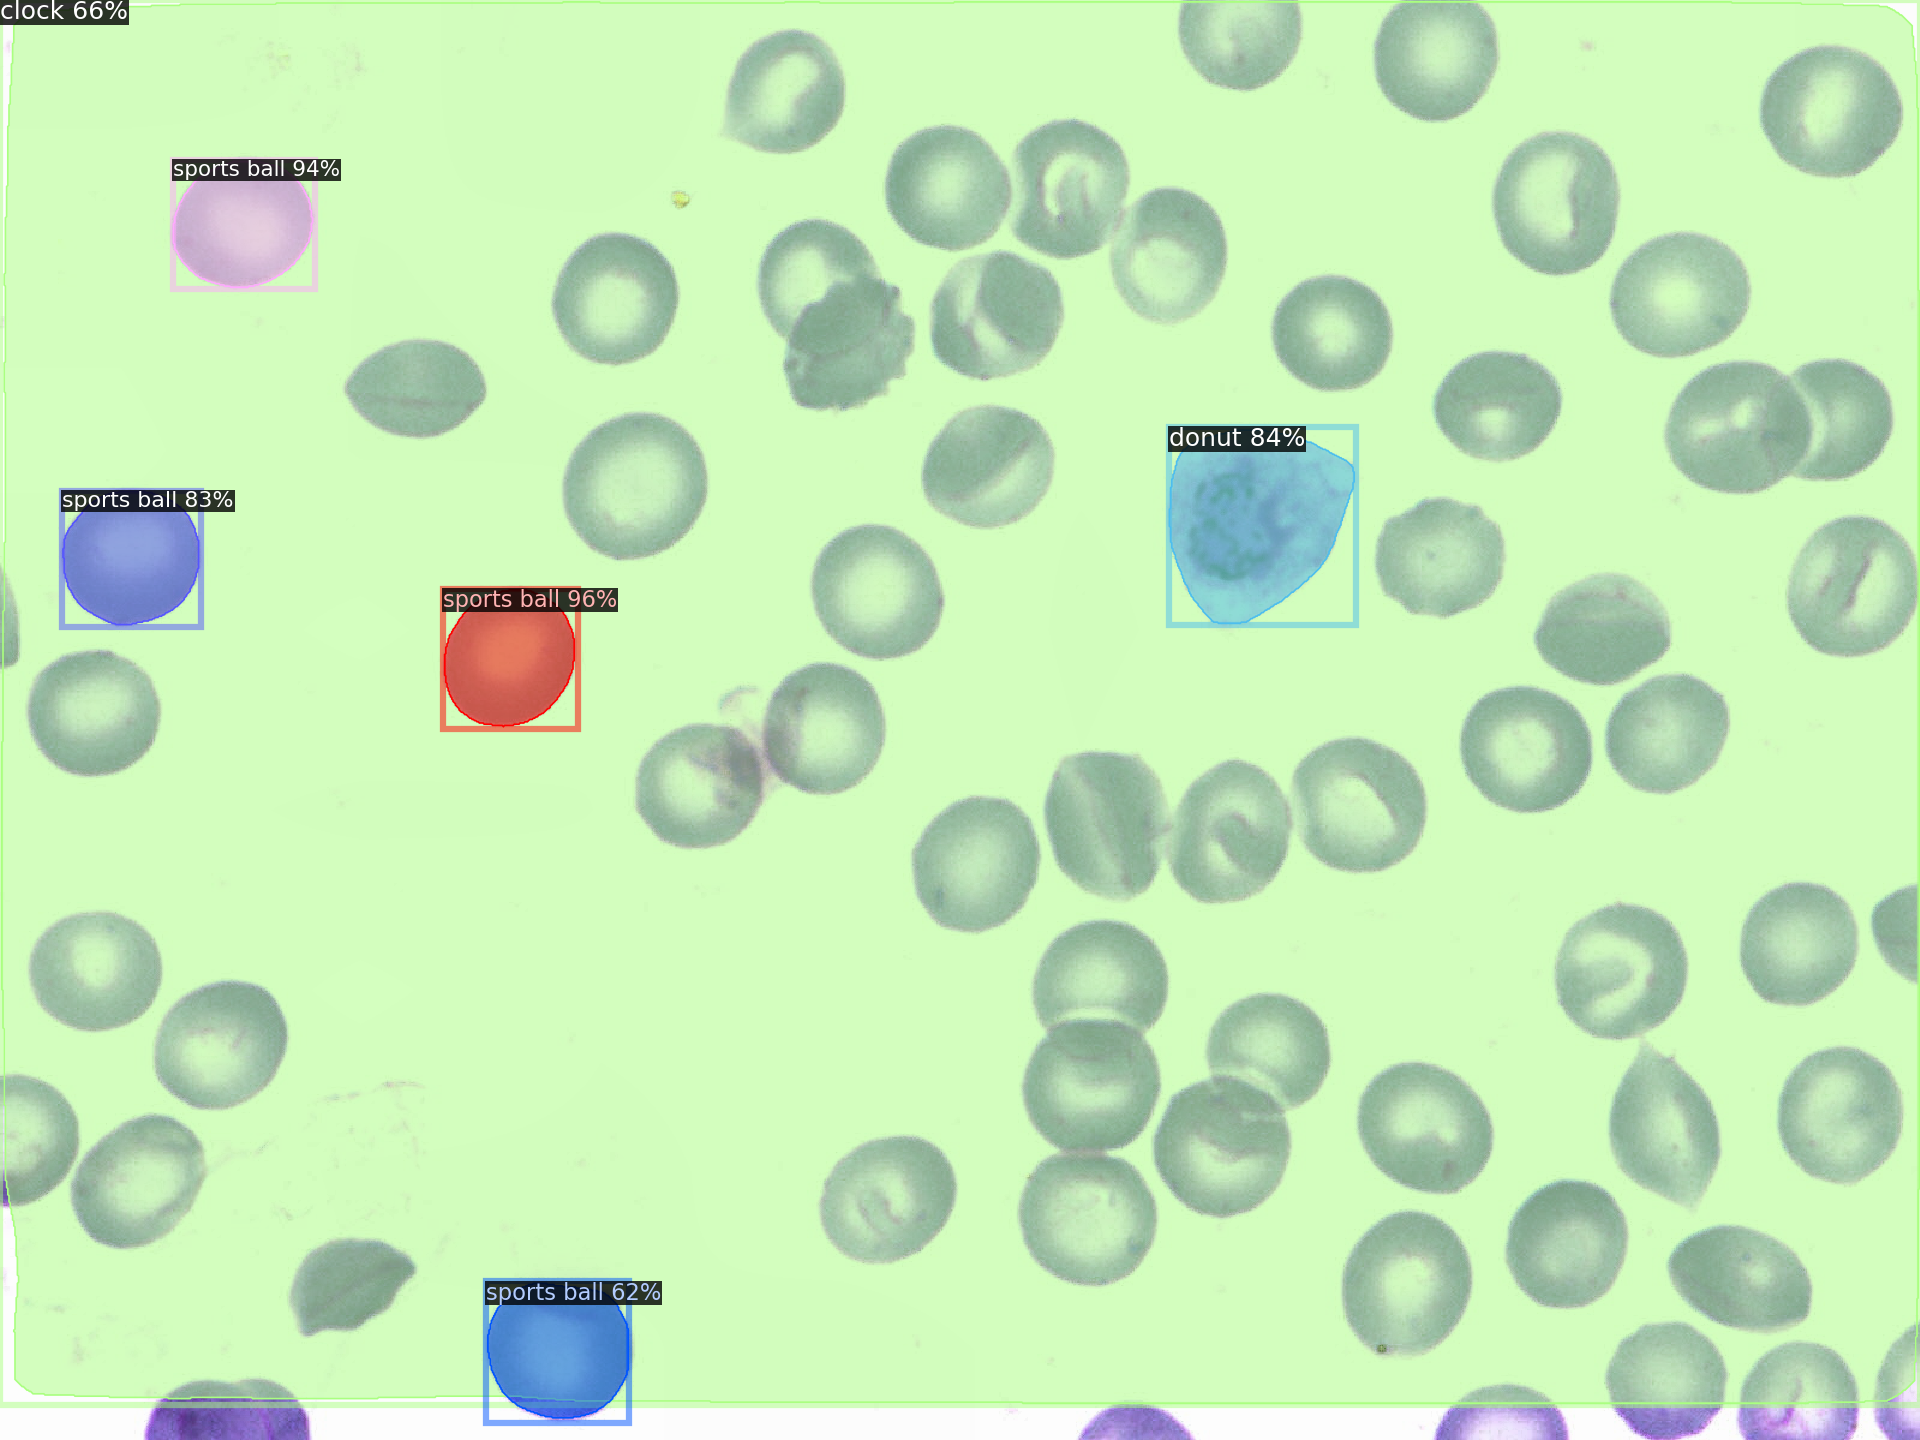

In [7]:
# we can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
dataset_dicts = get_

**Training on the custom dataset - malaria detection**

In [8]:
# prepare the data
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/training.json", "/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/images")
register_coco_instances("my_dataset_val", {}, "/kaggle/input/p-vivax-malaria-infected-human-blood-smears/malaria/test.json", "")

In [15]:
# training 
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file ("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = "my_dataset_train"
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0025 # pick a big learning rate
cfg.SOLVER.MAX_ITER = 900
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[04/28 04:15:19 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

AssertionError: annotation file format <class 'list'> not supported